# Counterfactual Explainability for Images: Unveiling Model Decision-Making

**Disclaimer: This notebook explores the concept of counterfactual explainability in the context of image classification. It aims to shed light on the interpretability of model decisions by generating counterfactual examples. Towards the end of the notebook, we will draw parallels between counterfactual explanations and adversarial attacks, emphasizing the delicate boundary between the two.**

## Overview

Counterfactual explainability involves creating instances that, while being similar to the original input, lead to different model predictions. In the realm of image classification, this method allows us to understand how small perturbations to an image might influence the model's decision-making.

## Counterfactual vs. Adversarial: A Thin Line

It is worth noting the intriguing similarity between counterfactual explanations and adversarial attacks. Both involve the introduction of perturbations to the input, intending to alter the model's prediction. However, the intent behind these perturbations differs fundamentally:

- **Counterfactual Explainability:** Designed to provide insights into why a model made a specific prediction. Perturbations aim to steer the model towards a different decision while maintaining a plausible real-world resemblance.

- **Adversarial Attacks:** Crafted to deceive the model, leading to incorrect predictions. Perturbations are often optimized to be imperceptible to humans but strategically tailored to misguide the model's decision.

## Usage Guidelines

- This notebook employs counterfactual explainability techniques to unravel the decision-making process of an image classification model.
- Perturbations are introduced to the original image to generate counterfactual examples.
- Towards the end, we explore the fine line between counterfactual explanations and adversarial attacks, showcasing the nuances in their objectives and outcomes.

**Note:** Adjustments and modifications may be required based on the specific image classification model and dataset used. Always refer to the documentation and guidelines provided by the underlying deep learning framework.

---

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torchvision import models, datasets
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

# Loading a Pre-trained ResNet50 Model

In this section, a pre-trained ResNet50 model is loaded using PyTorch and torchvision. The ResNet50 model is a widely used convolutional neural network architecture known for its effectiveness in image classification tasks.


In [ ]:
# Load a pre-trained ResNet50 model
model = resnet50(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 65.0MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Next, a pre-trained ResNet50 model is loaded using the **resnet50** class from torchvision. The ```pretrained=True``` argument ensures that the model is initialized with pre-trained weights. Additionally, the model is set to evaluation mode using ```model.eval()```, indicating that it will be used for inference rather than training.

This loaded ResNet50 model can now be utilized for various image classification tasks, and further steps can be taken to classify images, generate counterfactual examples, or perform other interpretability analyses.

# Loading and Preprocessing an Image

Next, an image is fetched from the specified URL using the Python requests library and loaded into a PIL (Python Imaging Library) Image object.

In [ ]:
# Load and preprocess the image
#image_url = 'https://www.travelandleisure.com/thmb/aKGPQXqw0jHSLjgYhjnpgD__s7g=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/plane-data-BUSYROUTES1217-f4f84b08d47f4951b11c148cee2c3dea.jpg'
#image_url = 'https://www.modernquests.com/cdn/shop/files/asa-selection-germany-seasons-pasta-plate-denim-1_700x.jpg'
image_url = 'https://espacepourlavie.ca/sites/espacepourlavie.ca/files/styles/gal-photo-large/public/_s2c8076_0.jpg?itok=jzTPkbgO'
# Fetch the image from the URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

The image is loaded and stored in the ```img``` variable.

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [ ]:
image = preprocess(img).unsqueeze(0)

The image is preprocessed using a sequence of transformations defined by
```transforms.Compose```. These transformations include resizing the image to a square of size **224x224** pixels and converting it to a PyTorch tensor.

The preprocessed image can now be fed into the **ResNet50** model for inference or other analysis tasks.

# Displaying the Original Image

In this section, the original image, fetched from a specified URL, is displayed using matplotlib.

The code utilizes matplotlib to display the original image. The image tensor is transformed to a NumPy array and then transposed to match the standard format for image display (HWC - Height, Width, Channels). The resulting image is shown without axis labels, and the title 'Original image' is displayed at the top.

This visualization provides a view of the original image that will be used for subsequent analysis, such as generating a counterfactual example or conducting image classification using the ResNet50 model.

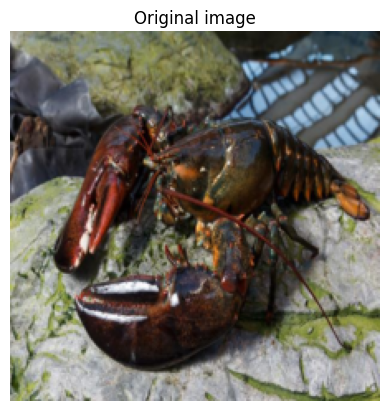

In [ ]:
# Display the counterfactual image
plt.imshow(image.squeeze(0).numpy().transpose((1, 2, 0)))
plt.title('Original image')
plt.axis('off')
plt.show()

# Retrieving ImageNet Class Label Descriptions

In this section, a function named `get_label_description` is defined to fetch the class labels for ImageNet classes from an online source.

The code begins by importing the `requests` library, which will be used to fetch ImageNet class labels.



In [ ]:
def get_label_description(target_class):
    # Fetch ImageNet class labels from an online source
    labels_url = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
    response = requests.get(labels_url)
    labels = response.json()
    return labels[target_class]

In [ ]:
print(f'Predicted as {get_label_description(torch.argmax(model(image), dim=1))}')

Predicted as American lobster


The function ```get_label_description``` takes a ```target_class``` as input and fetches the ImageNet class labels from an online JSON file. The JSON file contains simple descriptions for ImageNet classes. The label corresponding to the provided target_class index is returned by the function.

This function is useful for obtaining human-readable descriptions for the classes predicted by image classification models.

# Generating Counterfactual Image

In this section, a function named `generate_counterfactual` is defined for generating a counterfactual image. The function takes a pre-trained image classification model, an original image, the target class index, and optional parameters for the optimization process.

In [ ]:
def generate_counterfactual(model, original_image, target_class, max_iterations=100, epsilon=0.02):
  perturbed_image = original_image.clone().detach().requires_grad_(True)

  for _ in range(max_iterations):
    output = model(perturbed_image)
    loss = torch.nn.CrossEntropyLoss()(output, torch.tensor([target_class]))
    loss.backward()

    # Update image with gradient descent step
    perturbed_image.data = perturbed_image.data - epsilon * perturbed_image.grad.data
    perturbed_image.grad.zero_()

    # Clip the perturbed image to be within valid range [0, 1]
    perturbed_image.data = torch.clamp(perturbed_image.data, 0, 1)

    # Check if the perturbed image now predicts the target class
    if torch.argmax(model(perturbed_image)) == target_class:
      break

  return perturbed_image.detach()

The ```generate_counterfactual``` function generates a counterfactual image through an iterative optimization process. It perturbs the original image to influence the model's prediction toward the specified target_class. The optimization involves updating the image with gradient descent steps while ensuring the perturbed image predicts the target class.

This function can be used to explore how small modifications to an image can lead to a change in the model's classification decision.

**Note: Ensure that your model is in evaluation mode (```model.eval()```) before using this function.**

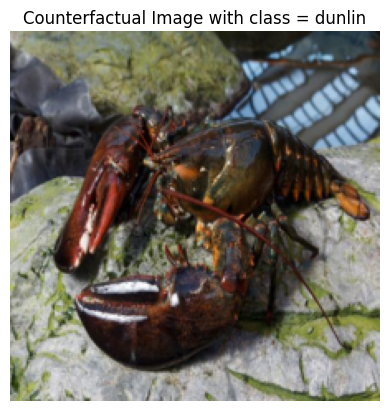

In [ ]:
# Generate counterfactual example
target_class = 140 # Replace with the desired target class
model.eval()
counterfactual_example = generate_counterfactual(model, image, target_class)

# Display the counterfactual image
plt.imshow(counterfactual_example.squeeze(0).numpy().transpose((1, 2, 0)))
plt.title(f'Counterfactual Image with class = {get_label_description(target_class)}')
plt.axis('off')
plt.show()

# Visualizing Pixel-wise Absolute Differences

In this section, the pixel-wise absolute differences between the original image and the counterfactual example are calculated and visualized using matplotlib.

The code calculates the absolute differences between corresponding pixels of the original image (```image```) and the counterfactual example (```counterfactual_example```). The resulting pixel differences are stored in the ```pixel_diff``` tensor, and a scaling factor is applied to enhance visualization.

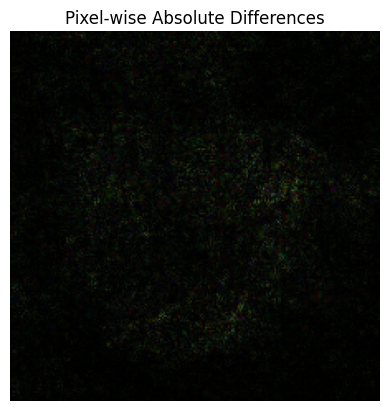

In [ ]:
# Calculate pixel-wise absolute differences
pixel_diff = torch.abs(image - counterfactual_example)
scaled_diff = pixel_diff * 10  # Adjust the scaling factor as needed

# Display the counterfactual image
plt.imshow(scaled_diff.squeeze(0).numpy().transpose((1, 2, 0)))
plt.title('Pixel-wise Absolute Differences')
plt.axis('off')
plt.show()

The pixel-wise absolute differences are visualized using matplotlib. The image is displayed with the title 'Pixel-wise Absolute Differences', and the axis labels are turned off for better visualization.

This visualization provides insights into the specific areas of the image where pixel values have changed between the original and counterfactual images.

**Note: Adjust the scaling factor based on the magnitude of pixel differences for better visualization.**